<a href="https://colab.research.google.com/github/Juan2341/MovingObjectDetection/blob/main/Moving_Object_Detection_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import PIL
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np

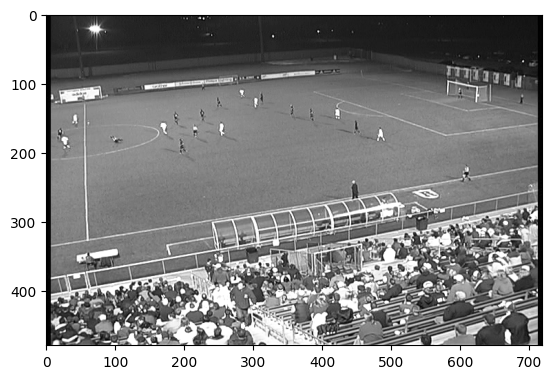

In [ ]:
#Image I1
opencv_img_soccer1 = cv2.imread('soccer1.bmp')
ski_img_soccer1 = skimage.io.imread('soccer1.bmp')
plt.imshow(ski_img_soccer1, cmap=plt.cm.gray)

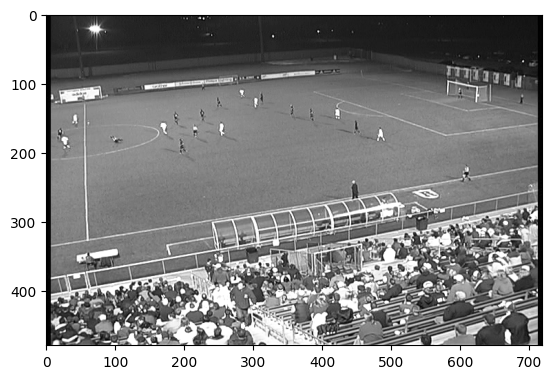

In [ ]:
#Image I2
opencv_img_soccer2 = cv2.imread('soccer2.bmp')
ski_img_soccer2 = skimage.io.imread('soccer2.bmp')
plt.imshow(ski_img_soccer1, cmap=plt.cm.gray)

In [ ]:
diff = cv2.absdiff(ski_img_soccer1, ski_img_soccer2)

In [ ]:
#Convert the absolute difference image to an array
abs_diff_arr = np.asarray(diff)

(array([[480.,   0.,   0., ...,   0.,   0.,   0.],
        [480.,   0.,   0., ...,   0.,   0.,   0.],
        [480.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [480.,   0.,   0., ...,   0.,   0.,   0.],
        [480.,   0.,   0., ...,   0.,   0.,   0.],
        [480.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0.,  21.,  42.,  63.,  84., 105., 126., 147., 168., 189., 210.]),
 <a list of 720 BarContainer objects>)

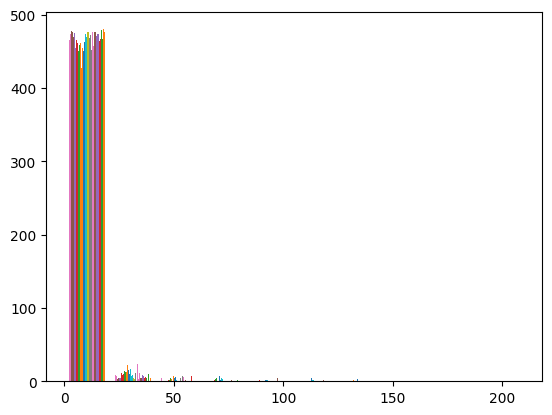

In [ ]:
plt.hist(abs_diff_arr)


#hist_np, bin_edges = np.histogram(abs_diff_arr, bins=256, range=(0,256))
#plt.bar(range(256), hist_np, width=1.0, color='black')

In [ ]:
diff_stretched = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

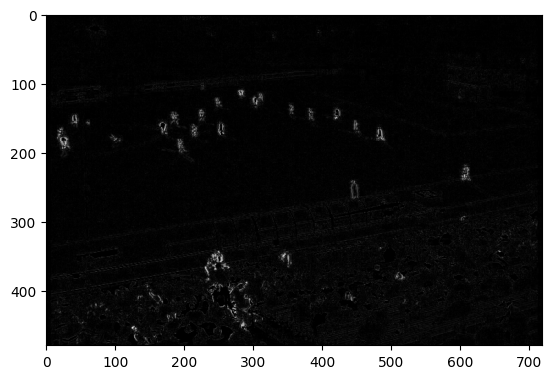

In [ ]:
plt.imshow(diff_stretched, cmap=plt.cm.gray)

In [ ]:
def threshold_binary(d_img):

  #Creating the binary mask
  percentages = [2,1,0.1,0.01]

  for p in percentages:
    threshold = np.percentile(d_img, 100 - p)
    binary_mask = np.where(d_img > threshold, 1, 0)

    #Display the moving image
    plt.figure(figsize=(12,6))
    plt.title(f'{p}% Threshold')
    plt.imshow(binary_mask, cmap='gray')
    plt.axis('off')
    plt.show()







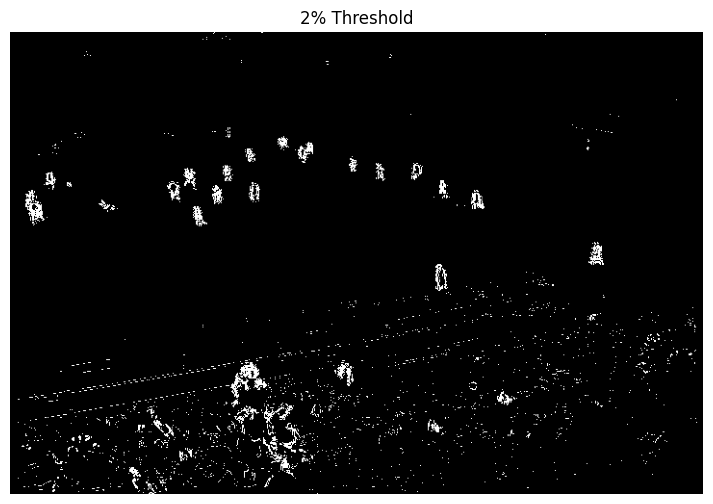

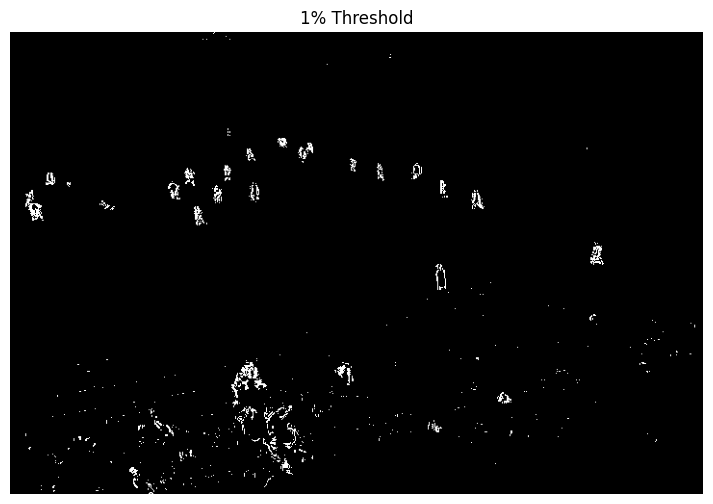

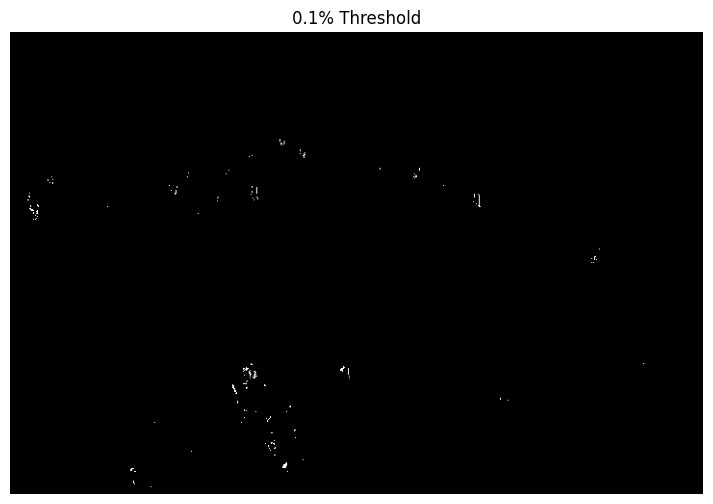

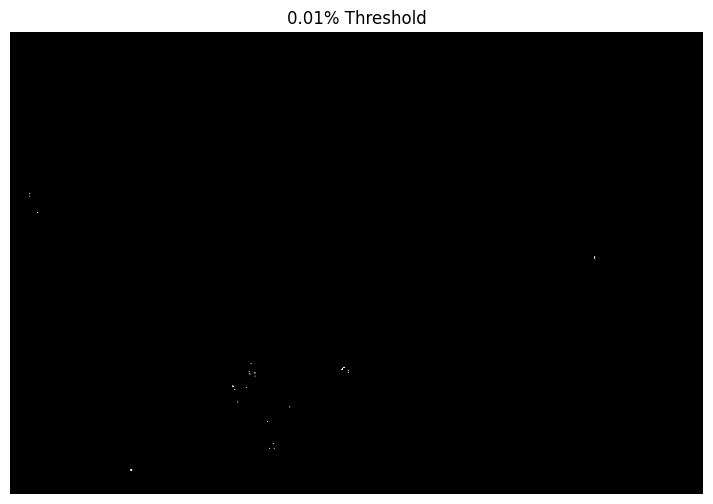

In [ ]:
#Showing the results
threshold_binary(diff_stretched)


In [ ]:
#Getting the best binary mask
def single_mask(d_img):

  percentage = 2
  threshold = np.percentile(d_img, 100 - 2)
  binary_mask = np.where(d_img > threshold, 1, 0)

  plt.figure(figsize=(12,6))
  plt.imshow(binary_mask, cmap='gray')
  plt.title('Binary mask')
  plt.axis('off')
  plt.show()

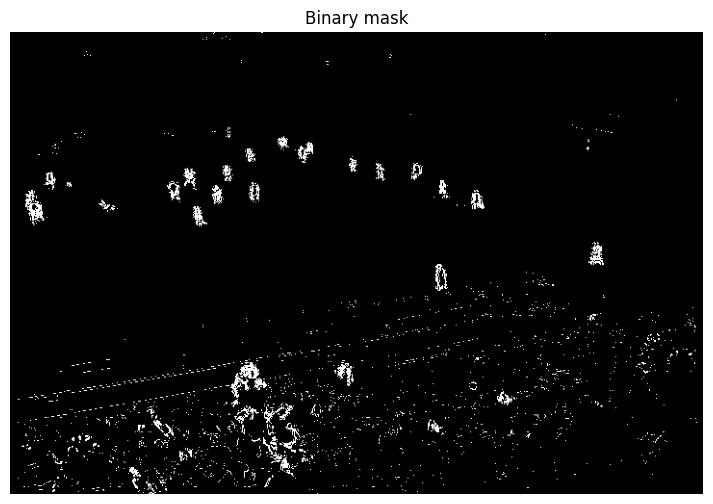

In [ ]:
mask = single_mask(diff_stretched)

In [ ]:
def visualizing_img(d_img, I2):

      threshold = np.percentile(d_img, 100 - 2)
      binary_mask = np.where(d_img > threshold, 1, 0)

      # Create Im based on the binary mask
      Im = I2.copy()  # Make a copy of I2
      Im[binary_mask == 0] = 0  # Set non-moving pixels to 0

      # Display the resulting image
      plt.figure(figsize=(12, 6))
      plt.title(f'Im for 2% Threshold')
      plt.imshow(Im, cmap='gray')
      plt.axis('off')
      plt.show()

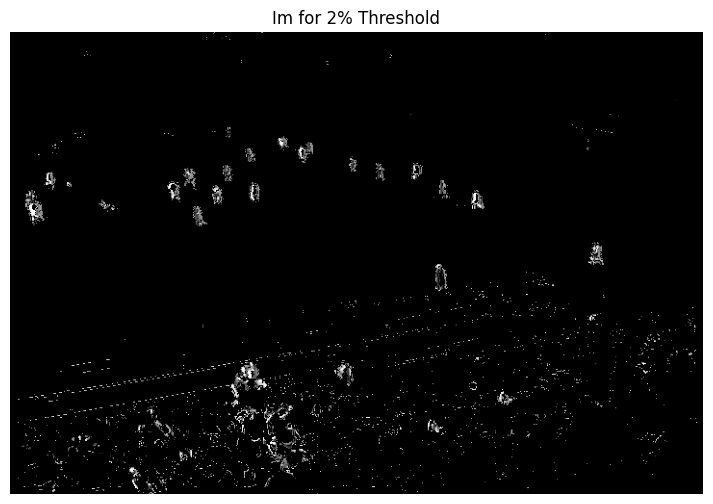

In [ ]:
v_img = visualizing_img(diff_stretched, ski_img_soccer2)

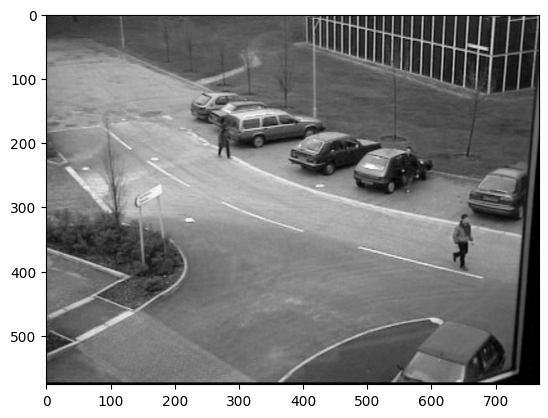

In [ ]:
#Detecting moving people and vechicles

#Getting the images 1015, 1020, and 1025 and converting them to grayscale
opencv_vehicle1 = cv2.imread('1015.jpg')
ski_vehicle1 = skimage.io.imread('1015.jpg')
ski_vehicle1_gray = np.average(ski_vehicle1, axis=-1)
plt.imshow(ski_vehicle1_gray, cmap=plt.cm.gray)

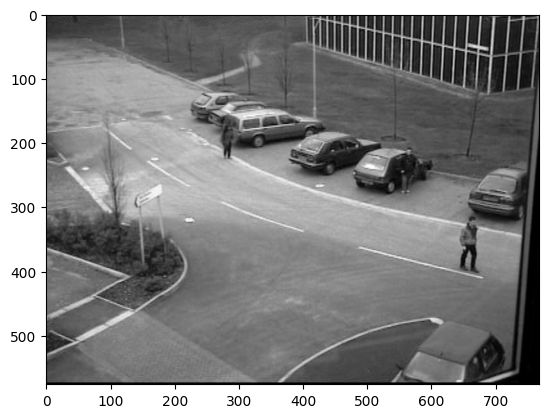

In [ ]:
opencv_vehicle2 = cv2.imread('1020.jpg')
ski_vehicle2 = skimage.io.imread('1020.jpg')
ski_vehicle2_gray = np.average(ski_vehicle2, axis=-1)
plt.imshow(ski_vehicle2_gray, cmap=plt.cm.gray)

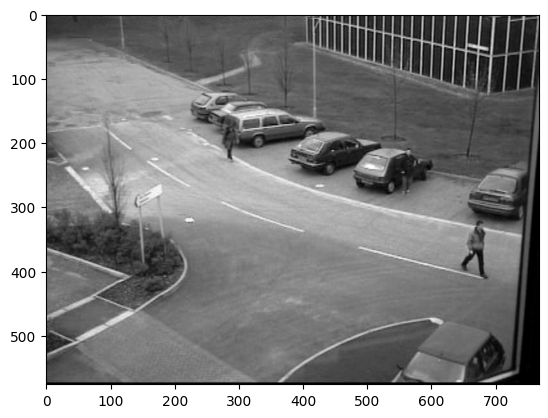

In [ ]:
opencv_vehicle3 = cv2.imread('1025.jpg')
ski_vehicle3 = skimage.io.imread('1025.jpg')
ski_vehicle3_gray = np.average(ski_vehicle3, axis=-1)
plt.imshow(ski_vehicle3_gray, cmap=plt.cm.gray)

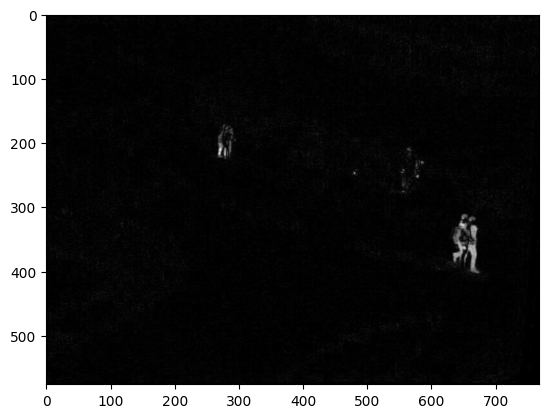

In [ ]:
#Getting the absolute difference between the three pictures

#Absolute diff of images 1015 and 1020
vehicle12_diff = cv2.absdiff(ski_vehicle1_gray, ski_vehicle2_gray)
vehicle12_stretched = cv2.normalize(vehicle12_diff, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(vehicle12_stretched, cmap=plt.cm.gray)

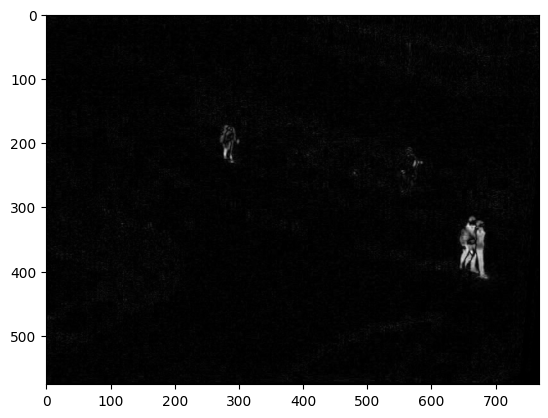

In [ ]:
#Absolute diff of images 1020 and 1025
vehicle23_diff = cv2.absdiff(ski_vehicle2_gray, ski_vehicle3_gray)
vehicle23_stretched = cv2.normalize(vehicle23_diff, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(vehicle23_stretched, cmap=plt.cm.gray)

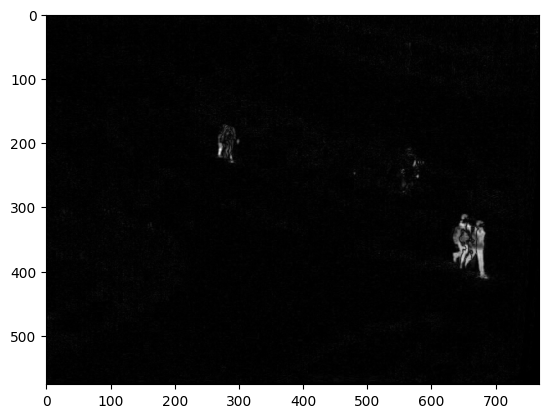

In [ ]:
#Absolute diff of images vehicel12_stretched and vehicel23_stretched
vehicle_total_diff = cv2.absdiff(vehicle12_stretched, vehicle23_stretched)
vehicle_total_stretched = cv2.normalize(vehicle_total_diff, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(vehicle_total_stretched, cmap=plt.cm.gray)

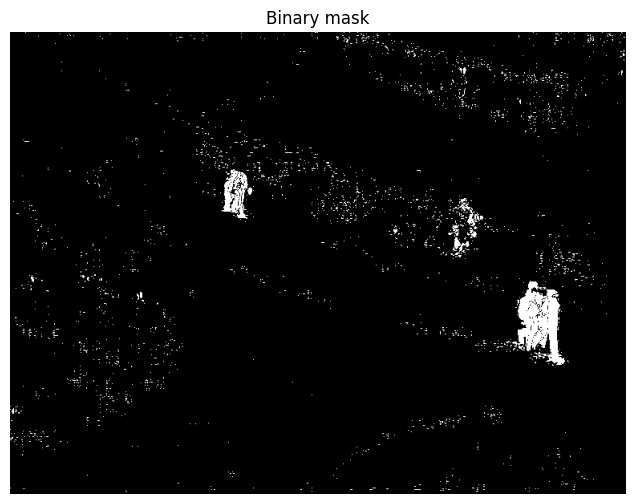

In [ ]:
#Getting the binary mask of the image
vehicle_threshold_img = single_mask(vehicle_total_stretched)

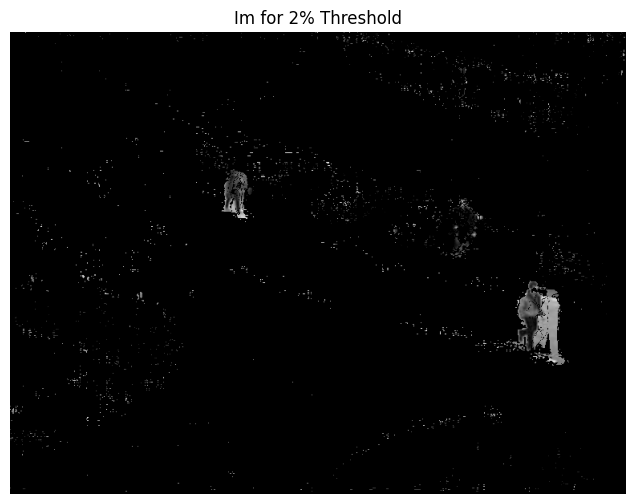

In [ ]:
#Visualizing the final image
vehicle_final_img1 = visualizing_img(vehicle_total_stretched, ski_vehicle1_gray)

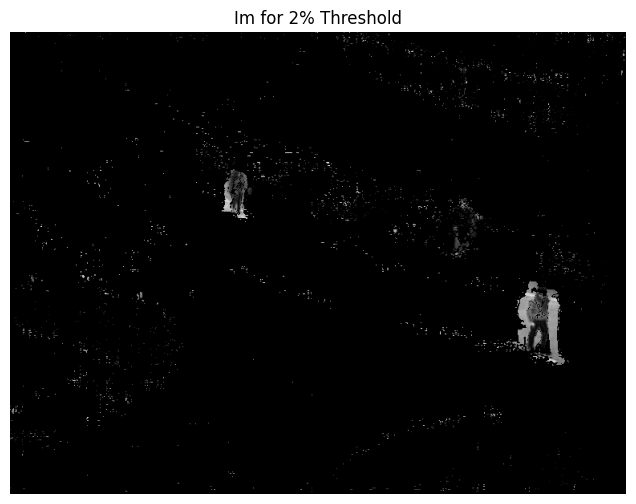

In [ ]:
vehicle_final_img2 = visualizing_img(vehicle_total_stretched, ski_vehicle2_gray)

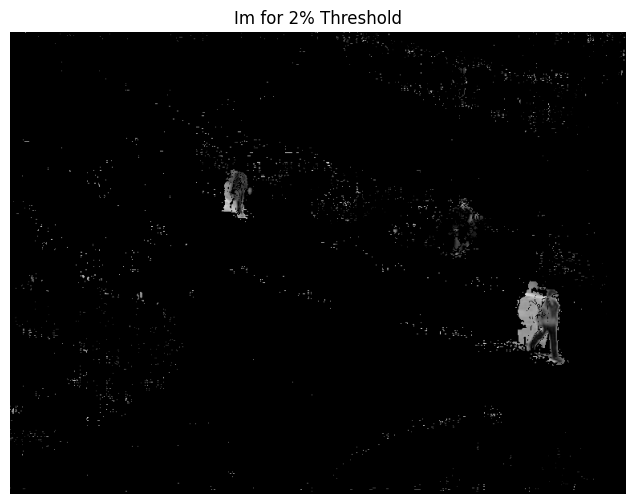

In [ ]:
vehicle_final_img3 = visualizing_img(vehicle_total_stretched, ski_vehicle3_gray)

In [ ]:
def motion_blur(images, alpha, t=0):
  if t == len(images) - 1:
    return images[t]
  else:
    It = images[t]
    B_previous = motion_blur(images, alpha, t + 1)
    B = cv2.addWeighted(B_previous, alpha, It, 1 - alpha, 0)
    return B

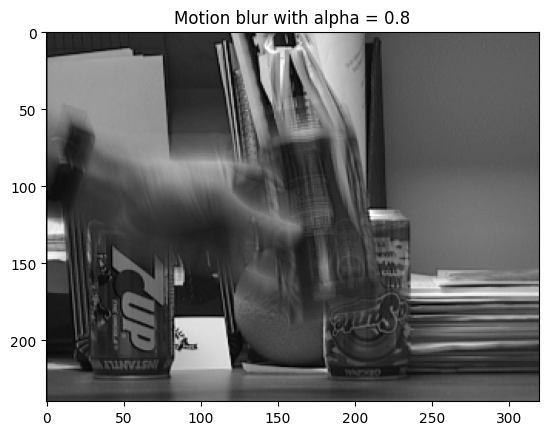

In [ ]:
#Getting all the .tif images
tif_paths = ['100.tif', '101.tif', '102.tif', '103.tif', '104.tif', '105.tif', '106.tif',
             '107.tif', '108.tif', '109.tif', '110.tif']
opencv_tif_images = [cv2.imread(tif_path) for tif_path in tif_paths]
ski_tif_images = [skimage.io.imread(tif_path) for tif_path in tif_paths]

#Setting alpha
alpha = 0.8

#Creating the motion blur effect
motion_blur_img = motion_blur(ski_tif_images, alpha)
plt.title('Motion blur with alpha = 0.8')
plt.imshow(motion_blur_img, cmap=plt.cm.gray)

In [ ]:
opencv_tif100_img = cv2.imread('100.tif')
ski_tif100_img = skimage.io.imread('100.tif')

In [ ]:
selfie = PIL.Image.open('/content/selfie.png')

new_selfie = selfie.resize((640,480))
new_selfie.save('/content/selfie.png')

opencv_selfie_img = cv2.imread('selfie.png')
ski_selfie_img = skimage.io.imread('selfie.png')

In [ ]:
def linear_filter(img):
  #Kernel
  kernel = np.ones((1,7), dtype=np.float32) / 7

  #Applying convolution
  blurred_img = cv2.filter2D(img, -1, kernel)

  #Display blurred image
  plt.imshow(blurred_img, cmap=plt.cm.gray)

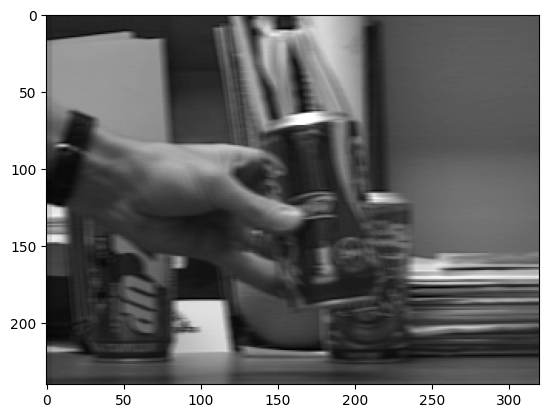

In [ ]:
linear_filter(ski_tif100_img)

In [ ]:
linear_filter(ski_selfie_img)